In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

In [32]:
df = pd.read_csv('data/preprocessed_0815.csv')
df.head()

,realized_volatility,seconds_count,seconds_right_skew,seconds_skewness,seconds_kurtosis,wap_skewness,wap_kurtosis,bid_size1_skewness,bid_size1_max,bid_size1_mean,ask_size1_skewness,ask_size1_max,ask_size1_mean,bid_size2_skewness,ask_size2_skewness,row_id,size_max,size_sum,order_count_max,target
0,0.004499,302.0,152.841727,0.510418,-1.181185,-0.853924,3.512603,-0.803095,500.0,78.264901,-0.246879,228.0,74.579470,-0.669089,-0.426180,0-5,499.0,3179.0,12.0,0.004136
1,0.001204,200.0,147.965217,-0.362378,-1.001272,0.091449,0.511806,0.288387,402.0,149.965000,1.345276,400.0,71.145000,1.269870,-0.172575,0-11,280.0,1289.0,6.0,0.001445
2,0.002369,188.0,159.897059,0.506732,-1.216982,-0.960020,-0.131697,-0.164424,304.0,96.132979,1.279381,449.0,131.037234,0.538682,-1.122790,0-16,391.0,2161.0,8.0,0.002168
3,0.002574,120.0,120.509434,-0.032548,-1.013334,0.692342,-0.116943,0.448781,370.0,114.458333,0.480632,400.0,120.800000,1.293843,0.790816,0-31,450.0,1962.0,15.0,0.002195
4,0.001894,176.0,131.988764,-0.402382,-1.151718,0.377272,-1.027612,0.579404,402.0,119.823864,0.121758,333.0,88.477273,-0.434153,1.519461,0-62,341.0,1791.0,17.0,0.001747


### Difference 1 : df.target - df.realized_volatility
### Difference 2 : np.log1p(df.target / df.realized_volatility)
### Difference 3 : df.target / df.realized_volatility

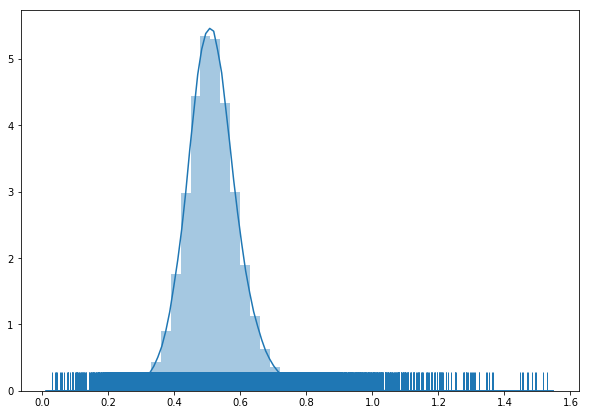

In [160]:
# 2. np.log1p(df.target / df.realized_volatility)

plt.figure(figsize = (10, 7))
sns.distplot(np.log1p(np.log1p(df.target / df.realized_volatility)), kde = True, rug = True)
plt.show()

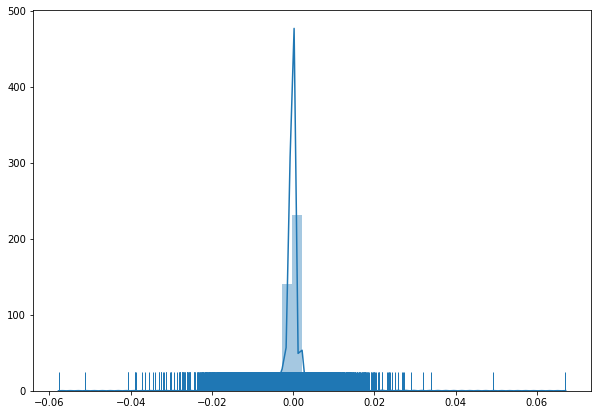

In [158]:
# 1. df.target - df.realized_volatility

plt.figure(figsize = (10, 7))
sns.distplot((df.target - df.realized_volatility), kde = True, rug = True)
plt.show()

In [33]:
target_outliers = df[df.target>=0.015].index
df.drop(target_outliers, axis=0, inplace=True)
df.reset_index(inplace = True, drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424413 entries, 0 to 424412
Data columns (total 20 columns):
realized_volatility    424413 non-null float64
seconds_count          424413 non-null float64
seconds_right_skew     424413 non-null float64
seconds_skewness       424413 non-null float64
seconds_kurtosis       424413 non-null float64
wap_skewness           424413 non-null float64
wap_kurtosis           424413 non-null float64
bid_size1_skewness     424413 non-null float64
bid_size1_max          424413 non-null float64
bid_size1_mean         424413 non-null float64
ask_size1_skewness     424413 non-null float64
ask_size1_max          424413 non-null float64
ask_size1_mean         424413 non-null float64
bid_size2_skewness     424413 non-null float64
ask_size2_skewness     424413 non-null float64
row_id                 424413 non-null object
size_max               424413 non-null float64
size_sum               424413 non-null float64
order_count_max        424413 non-null float

In [34]:
# seconds_count 4
# bid_size1_mean 4
# realized_volatility 2
# bid_size1_skewness 2
# ask_size1_mean 2
# size_max 2
# ask_size1_skewness 2
# seconds_kurtosis
# seconds_right_skew

small_df = df[['bid_size1_mean','seconds_count','row_id','target']]

# realized_vol 쓸때면
# small_df.columns = ['realized_vol', 'row_id', 'target']

small_df.head()

,bid_size1_mean,seconds_count,row_id,target
0,78.264901,302.0,0-5,0.004136
1,149.965000,200.0,0-11,0.001445
2,96.132979,188.0,0-16,0.002168
3,114.458333,120.0,0-31,0.002195
4,119.823864,176.0,0-62,0.001747


In [15]:
rev = df['realized_volatility']
label = df['target']
small_df['target'] = np.log1p(np.log1p(label / rev))
small_df['original_target'] = label
small_df['realized_volatility'] = rev
small_df.head()

C:\Users\frank\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\frank\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\frank\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,bid_size1_mean,seconds_count,row_id,target,original_target,realized_volatility
0,78.264901,302.0,0-5,0.501928,0.004136,0.004499
1,149.965000,200.0,0-11,0.581208,0.001445,0.001204
2,96.132979,188.0,0-16,0.500726,0.002168,0.002369
3,114.458333,120.0,0-31,0.480436,0.002195,0.002574
4,119.823864,176.0,0-62,0.502916,0.001747,0.001894


In [36]:
# 1. If scaling is needed, run this cell.

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

X, y, idx = small_df.drop(['row_id','target','realized_volatility','original_target'], axis=1), small_df['target'], small_df[['row_id','original_target','realized_volatility']]

stdsc = StandardScaler()
X_scaled_arr = stdsc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_arr, columns = X.columns)
X_scaled.head()

KeyError: "['realized_volatility' 'original_target'] not found in axis"

In [135]:
# 2. if scaling is not needed, run this cell.

from sklearn.preprocessing import PolynomialFeatures

X_scaled, y, idx = small_df.drop(['row_id','target','realized_volatility','original_target'], axis=1), small_df['target'], small_df[['row_id','original_target','realized_volatility']]

In [17]:
poly = PolynomialFeatures(degree=3)
X_poly_arr = poly.fit_transform(X_scaled)
X_poly = pd.DataFrame(X_poly_arr)
X_poly.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,-0.143876,-0.648630,0.020700,0.093322,0.420721,-0.002978,-0.013427,-0.060532,-0.272892
1,1.0,-0.129421,-1.397274,0.016750,0.180837,1.952376,-0.002168,-0.023404,-0.252678,-2.728004
2,1.0,-0.140274,-1.485350,0.019677,0.208355,2.206265,-0.002760,-0.029227,-0.309481,-3.277076
3,1.0,-0.136579,-1.984446,0.018654,0.271034,3.938027,-0.002548,-0.037018,-0.537852,-7.814804
4,1.0,-0.135497,-1.573426,0.018360,0.213195,2.475669,-0.002488,-0.028887,-0.335447,-3.895282


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [19]:
X_train, X_test, y_train, y_test, _, original_test = train_test_split(X_poly, y, idx, test_size = 0.2)

In [20]:
original_test.head()

,row_id,original_target,realized_volatility
64600,19-1178,0.003017,0.002854
68008,19-30789,0.005624,0.003994
97567,29-32635,0.002127,0.002382
71259,20-26020,0.001702,0.001722
210916,64-20271,0.007102,0.007233


In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

original_y_pred = np.expm1(np.expm1(y_pred)) * original_test['realized_volatility']
original_y_test = original_test['original_target']

# print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
# print('R2 :', r2_score(y_test, y_pred))
y_test_df = pd.DataFrame({'y_test':original_y_test, 'y_pred':original_y_pred})
y_test_df['rmspe_before'] = ((y_test_df.y_test-y_test_df.y_pred)/y_test_df.y_test)**2
print('RMSPE :',np.sqrt(y_test_df.rmspe_before.sum()/len(y_test_df)))

RMSPE : inf


C:\Users\frank\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in expm1
  """


In [27]:
y_test_df_drop_inf = y_test_df.drop(103245, axis=0)

In [29]:
print('RMSPE :',np.sqrt(y_test_df_drop_inf.rmspe_before.sum()/len(y_test_df_drop_inf)))

RMSPE : 0.33482599293089715
